第0此迭代的成本值为:0.6543912405149825
第10000此迭代的成本值为:0.0610169865749056
第20000此迭代的成本值为:0.060582435798513114


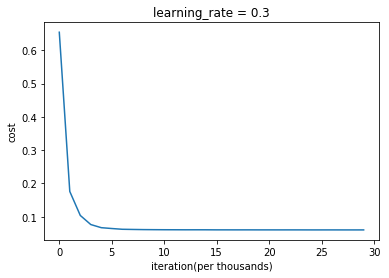

使用随机删除节点，训练集：
Accuracy: 0.9289099526066351
使用随机删除节点，测试集：
Accuracy: 0.95


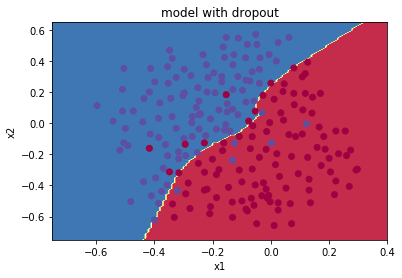

In [9]:
"""
测试dropout正则化的作用
"""
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import reg_utils

train_x , train_y ,test_x , test_y = reg_utils.load_2D_dataset(is_plot = False)

def model(X,Y,learning_rate = 0.3,num_iterations = 30000,print_cost = True,is_plot = True,lambd = 0,keep_prob = 1):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0] , 20 , 3 , 1]
    parameters = reg_utils.initialize_parameters(layers_dims)
    
    for i in range(0,num_iterations):
        if keep_prob == 1:
            a3 , cache = reg_utils.forward_propagation(X,parameters)
        elif keep_prob < 1:
            a3 , cache = forward_propagation_with_dropout(X,parameters,keep_prob)
        else:
            print("keep_prob参数错误！程序退出")
            exit
        if(lambd == 0):
            cost = reg_utils.compute_cost(a3,Y)
        else:
            cost = compute_cost_with_regularization(a3,Y,parameters,lambd)
        
        if (lambd == 0 and keep_prob == 1):
            grads = reg_utils.backward_propagation(X,Y,cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        parameters = reg_utils.update_parameters(parameters,grads,learning_rate)
        
        if(i % 1000 == 0):
            costs.append(cost)
            if(print_cost and i % 10000 == 0):
                print("第"+str(i)+"此迭代的成本值为:"+str(cost))
        
    if(is_plot):
            plt.plot(costs)
            plt.ylabel('cost')
            plt.xlabel('iteration(per thousands)')
            plt.title('learning_rate = '+str(learning_rate))
            plt.show()
        
    return parameters

def forward_propagation_with_dropout(X,parameters,keep_prob = 0.5):
    np.random.seed(1)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = reg_utils.relu(Z1)
    
    D1 = np.random.rand(A1.shape[0],A1.shape[1])
    D1 = D1 < keep_prob
    A1 = A1 * D1
    A1 = A1 / keep_prob
    
    Z2 = np.dot(W2,A1) + b2
    A2 = reg_utils.relu(Z2)
    
    D2 = np.random.rand(A2.shape[0],A2.shape[1])
    D2 = D2 < keep_prob
    A2 = A2 * D2
    A2 = A2 / keep_prob
    
    Z3 = np.dot(W3,A2) + b3
    A3 = reg_utils.sigmoid(Z3)
    
    cache = (Z1,D1,A1,W1,b1,Z2,D2,A2,W2,b2,Z3,A3,W3,b3)
    
    return  A3 ,cache

def backward_propagation_with_dropout(X,Y,cache,keep_prob):
    m = X.shape[1]
    (Z1,D1,A1,W1,b1,Z2,D2,A2,W2,b2,Z3,A3,W3,b3) = cache
    dZ3 = A3 - Y
    dW3 = (1 / m ) * np.dot(dZ3 , A2.T)
    db3 = (1 / m ) * np.sum(dZ3 , axis = 1 , keepdims = True)
    dA2 = np.dot(W3.T , dZ3)
    
    dA2 = dA2 * D2
    dA2 = dA2 / keep_prob
    dZ2 = np.multiply(dA2,np.int64(A2 > 0))
    dW2 = (1 / m ) * np.dot(dZ2 , A1.T)
    db2 = (1 / m ) * np.sum(dZ2 , axis = 1 , keepdims = True)
    dA1 = np.dot(W2.T , dZ2)
    
    dA1 = dA1 * D1
    dA1 = dA1 / keep_prob
    dZ1 = np.multiply(dA1,np.int64(A1 > 0))
    dW1 = (1 / m ) * np.dot(dZ1 , X.T)
    db1 = (1 / m ) * np.sum(dZ1 , axis = 1 , keepdims = True)
    
    gradients ={"dZ3" : dZ3, "dW3" : dW3, "db3" : db3,
                "dA2" : dA2, "dZ2" : dZ2, "dW2" : dW2, "db2" :  db2,
                "dA1" : dA1, "dZ1" : dZ1, "dW1" : dW1, "db1" :  db1
    }
    
    return gradients

parameters = model(train_x,train_y,keep_prob = 0.86,learning_rate=0.3,is_plot =True)
print("使用随机删除节点，训练集：")
predictions_train = reg_utils.predict(train_x,train_y,parameters)
print("使用随机删除节点，测试集：")
predictions_train = reg_utils.predict(test_x,test_y,parameters)

plt.title("model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75 , 0.40])
axes.set_ylim([-0.75 , 0.65])
reg_utils.plot_decision_boundary(lambda x : reg_utils.predict_dec(parameters , x.T),train_x,train_y)